In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess_text, build_vocabulary, generate_skip_grams, generate_cbow_pairs, data_import
from utils import SkipGram, CBOW

/home/psvel/Projects/MyOwnProjects/MyWord2Vec/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import random

In [3]:
text_corpus = data_import()

In [ ]:
text_corpus = text_corpus[:8000000]

In [6]:
processed_corpus = preprocess_text(text_corpus)
vocab, index_to_word = build_vocabulary(processed_corpus)
skip_grams = generate_skip_grams(processed_corpus)
cbow_pairs = generate_cbow_pairs(processed_corpus)

In [10]:
EMBEDDING_DIM = 100

In [11]:
skip_gram_model = SkipGram(len(vocab), EMBEDDING_DIM, vocab)    
skip_gram_losses = skip_gram_model.train(skip_grams, epochs=100)

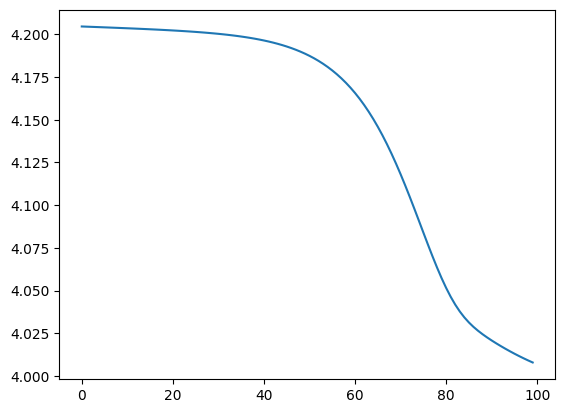

In [12]:
plt.plot(np.arange(len(skip_gram_losses)), skip_gram_losses)
plt.show()

In [13]:
cbow_models = CBOW(len(vocab), EMBEDDING_DIM, vocab)
cbow_losses = cbow_models.train(cbow_pairs, epochs=100)

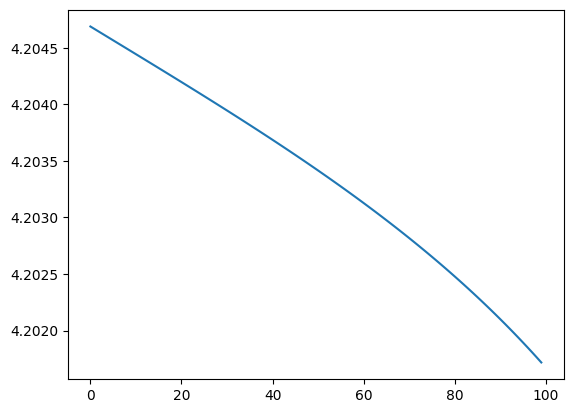

In [14]:
plt.plot(np.arange(len(cbow_losses)), cbow_losses)
plt.show()

In [21]:
sample_size = 50

In [22]:
random_vocab_subset = random.sample(list(vocab.keys()), sample_size)

In [30]:
# получаем список индексов
word_idxs = []
for word in random_vocab_subset:
    word_idxs.append(vocab[word])

# получаем эмбеддинги для skip-gram и cbow
skip_gram_embeddings = []
for word in random_vocab_subset:
    skip_gram_embeddings.append(skip_gram_model.embed(word))

cbow_embeddings = []
for word in random_vocab_subset:
    cbow_embeddings.append(cbow_models.embed(word))

In [35]:
skip_gram_embeddings = np.array(skip_gram_embeddings)
cbow_embeddings = np.array(cbow_embeddings)

In [36]:
from utils import reduce_to_k_dim, plot_embeddings

In [37]:
reduced_skip_gram_embeddings = reduce_to_k_dim(skip_gram_embeddings)
reduced_cbow_embeddings = reduce_to_k_dim(cbow_embeddings)

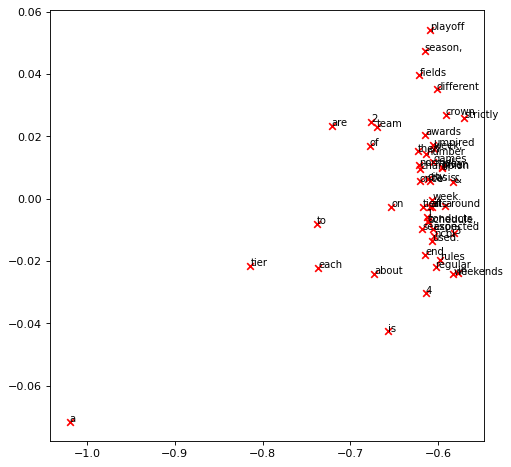

In [39]:
plot_embeddings(reduced_skip_gram_embeddings, random_vocab_subset)

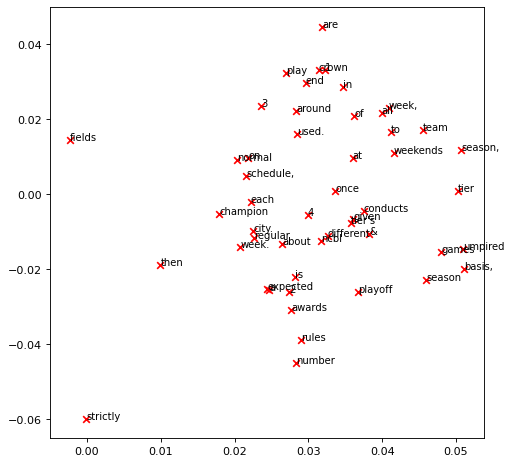

In [40]:
plot_embeddings(reduced_cbow_embeddings, random_vocab_subset)